# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [3]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')
print(earthquake[['INCIDENT DATE','LATITUDE','LONGITUDE']].head(10))

      INCIDENT DATE   LATITUDE   LONGITUDE
0  05/07/2010 17:26  18.233333  -72.533333
1  28/06/2010 23:06  50.226029    5.729886
2  24/06/2010 16:21  22.278381  114.174287
3  20/06/2010 21:59  44.407062    8.933989
4  18/05/2010 16:26  18.571084  -72.334671
5  26/04/2010 13:14  18.593707  -72.310079
6  26/04/2010 14:19  18.482800  -73.638800
7  26/04/2010 14:27  18.415000  -73.195000
8  15/03/2010 10:58  18.517443  -72.236841
9  15/03/2010 11:00  18.547790  -72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [2]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')
print(earthquake[earthquake.CATEGORY.isnull()].index)

Int64Index([1198, 1531, 1828, 2620, 2622, 2623], dtype='int64')


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [5]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')
earthquake['CATEGORY'].dropna()
print(earthquake.describe())
eq_filtered = earthquake[(earthquake['LATITUDE'] > 18) & (earthquake['LATITUDE'] < 20) & (earthquake['LONGITUDE'] > -75) & (earthquake['LONGITUDE'] < -70)].index
earthquake.drop(eq_filtered,inplace = True)

            Serial     LATITUDE    LONGITUDE
count  3593.000000  3593.000000  3593.000000
mean   2080.277484    18.611495   -72.322680
std    1171.100360     0.738572     3.650776
min       4.000000    18.041313   -74.452757
25%    1074.000000    18.524070   -72.417500
50%    2163.000000    18.539269   -72.335000
75%    3088.000000    18.561820   -72.293570
max    4052.000000    50.226029   114.174287


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [3]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')
#listeye almadan yaptım 
#ama yine de listeye aldığım algoritmayı yorum satırı şeklinde koyuyorum
#categories = earthquake['CATEGORY'].dropna().to_list()
#categories_1 = [i.split(",") for i in categories]
#categories_2 = [i for l in categories_1 for i in l]
#categories_3 = list(set(categories_2))
#categories_4 = [n.split("|") for n in categories_3]

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

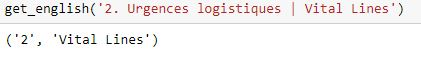

In [4]:
def get_english(element):
    a = element.split(".")
    b = element.split("|")
    try:
        print("('",a[0],"','",b[1],"')")
    except IndexError:
        print(tuple(a))

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [ ]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

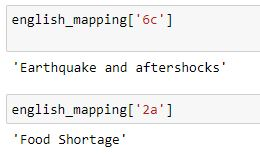

In [1]:
import pandas as pd
earthquake = pd.read_csv('earthquake.csv')
english_mapping = {}
categories = sorted(set(earthquake['CATEGORY'].dropna().to_list()))
categories_1 = [i.split(",") for i in categories]
categories_2 = [i for l in categories_1 for i in l]
categories_3 = [i.split(".") for i in categories_2]
for blank in categories_3:
    if blank == [' '] or blank == ['']:
        categories_3.remove(blank)
for item in categories_3:
    try:
        english_mapping[item[0]] = "'" + item[1].split("|")[1] + "'"
    except IndexError:
        english_mapping[item[0]] = "'" + item[1] + "'"
english_mapping['2a']

"' Food Shortage'"

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [2]:
import pandas as pd
births = pd.read_csv('births.csv')
births['halfdecade'] = 5 * (births['year'] // 5)
births_table = births.pivot_table('births',index = 'halfdecade', columns = 'gender', aggfunc='sum',margins = True,margins_name = 'quinquennial')
print(births_table.to_string())

gender               F         M  quinquennial
halfdecade                                    
1965           1753634   1846572       3600206
1970           8224392   8659947      16884339
1975           8038683   8461603      16500286
1980           8898836   9356506      18255342
1985           9411515   9886946      19298461
1990           9913375  10395760      20309135
1995           9566079  10024793      19590872
2000           9931641  10406088      20337729
2005           8297668   8700340      16998008
quinquennial  74035823  77738555     151774378


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

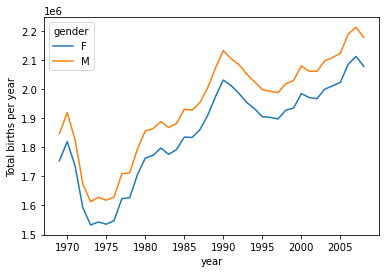

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
births = pd.read_csv('births.csv')
births_table2 = births.pivot_table('births',index = 'year',columns = 'gender',aggfunc = 'sum')
births_table2.plot()
plt.ylabel('Total births per year')
plt.show()
#i noticed there are rows that contains days' value as 99,that affects data in a bad way so we should drop it-well,i did not-
#with a quick research,i noticed in 1973,Roe v. Wade law has overturned and abortion made legal.
#this is 1 of the reasons of birth rate's fall.
#and we can see that at that exact date,female birth rate dropped MORE than male birth rate,
#so we can say female fetuses ARE MORE LIKELY TO BE ABORTED.well, interesting.
#but generally,we can say that births are increasing and will keep increasing;
#US will have a population problem eventually -with further data we can predict when-.
#so eventually people will need more space;as it stands, more land.

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

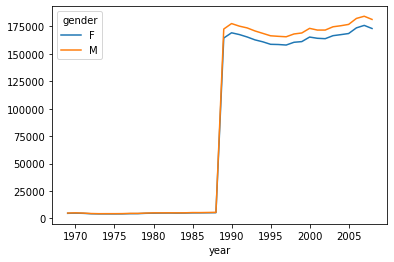

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
births = pd.read_csv('births.csv')
births.pivot_table('births',index = 'year',columns = 'gender',aggfunc = 'mean').plot()
plt.show()

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


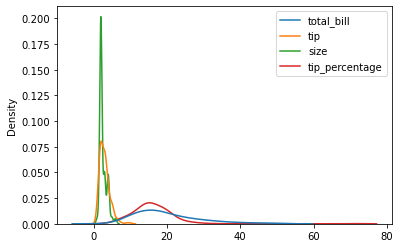

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tip = pd.read_csv('tip.csv')
tip['tip_percentage'] = tip['tip'] / tip['total_bill'] * 100
sns.kdeplot(data=tip)
plt.show()

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [1]:
import pandas as pd
tip = pd.read_csv('tip.csv')
tip['tip_percentage'] = tip['tip'] / tip['total_bill'] * 100
print(tip.groupby(['sex','smoker'])['tip_percentage'].mean())
print(tip.groupby(['sex','smoker'])['tip_percentage'].std())

sex     smoker
Female  No        15.692097
        Yes       18.215035
Male    No        16.066872
        Yes       15.277118
Name: tip_percentage, dtype: float64
sex     smoker
Female  No        3.642118
        Yes       7.159451
Male    No        4.184875
        Yes       9.058794
Name: tip_percentage, dtype: float64


### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

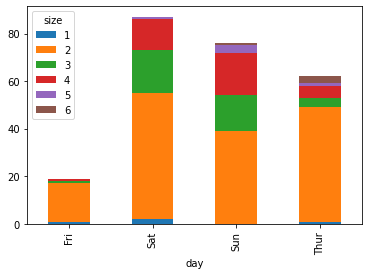

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
tip = pd.read_csv('tip.csv')
pd.crosstab(tip['day'], tip['size']).plot(kind ='bar',stacked = True)
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

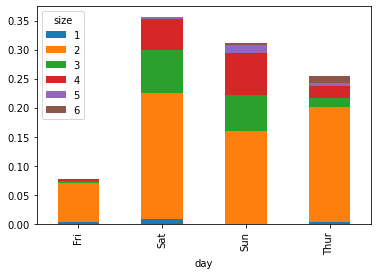

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
tip = pd.read_csv('tip.csv')
pd.crosstab(tip['day'],tip['size'],normalize=True).plot(kind='bar',stacked=True)
plt.show()